# XRAY Project


## Exploration

### viral_pneumonia

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from PIL import Image
import PIL
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [4]:
labels=['viral_pneumonia']
# , 'covid-19', 'bacterial_pneumonia', 'normal']

def load_data():    
    X, y = [], []
    
    for label in labels:
        path=os.path.join('raw_data', label)
        files=os.listdir(path)
        print(label)
        
        for file_name in files:
            file_path = os.path.join(path, file_name)
            image = Image.open(file_path)
            image = image.resize((256, 256))
            
#             if image.ndim == 2:
#                 tf.expand_dims(image, -1)
            
            X.append(np.array(image))
            y.append(label)   

    c = list(zip(X, y))
    np.random.shuffle(c)
    X, y = zip(*c)
    return X, np.array(y)

#     return np.array(X), np.array(y)


In [5]:
X_viral, y_viral = load_data();

viral_pneumonia


In [6]:
dim=[image.ndim for image in X_viral]

In [10]:
X_viral_clean=[]

for image in X_viral:
    if image.ndim ==2:
        X_viral_clean.append(image)

In [22]:
print(len(X_viral_clean))
[image.ndim for image in X_viral_clean]

1297


[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [9]:
X_viral_clean=np.array(X_viral_clean)

/Users/macbookair/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

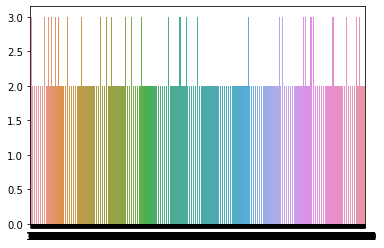

In [11]:
sns.barplot([i for i in range(len(dim))],dim)

In [12]:
count=0
   
for i in dim:
    if i ==3:
        count+=1
print(count)
print(len(dim))
count/len(dim)*100

215
1512


14.219576719576722

(array([1297.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         215.]),
 array([ 65536. ,  78643.2,  91750.4, 104857.6, 117964.8, 131072. ,
        144179.2, 157286.4, 170393.6, 183500.8, 196608. ]),
 <BarContainer object of 10 artists>)

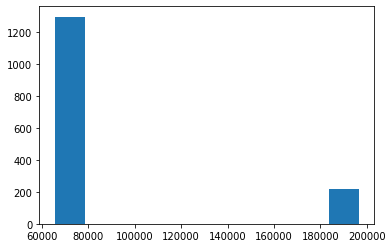

In [13]:
# hist plot for sizes
size=[image.size for image in X_viral]

plt.hist(size)

In [14]:
count=0
index=0
index_list=[]

for i in size:
    if i== 65536:
        count+=1
        index+=1
        
    else:
        index+=1
        index_list.append(i)
        

print(count)
print(len(index_list))
index_list[0]


1297
215


196608

In [ ]:
#individual pic
path=os.path.join('raw_data', 'normal')
files=os.listdir(path)
count=0
index=0
for file_name in files:
    file_path = os.path.join(path, file_name)
    image = Image.open(file_path)
    print(image.size)
#    image = image.resize((256, 256))
#    if len(image.size) != 2:
#         count+=1
#         print(index)
#     index+=1

count

### covid-19

In [15]:
labels=['covid-19']
X_covid, y_covid = load_data();

covid-19


/Users/macbookair/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

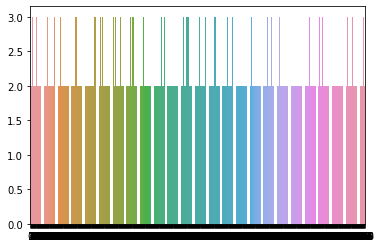

In [16]:
#, 'bacterial_pneumonia', 'normal']
dim_covid=[image.ndim for image in X_covid]
sns.barplot([i for i in range(len(dim_covid))],dim_covid)

In [19]:
X_covid_clean=[]

for image in X_covid:
    if image.ndim ==2:
        X_covid_clean.append(image)
# X_covid_clean=np.array(X_covid_clean)


In [23]:
len(X_covid_clean)

827

In [24]:
type(X_covid_clean)

list

(array([827.,   0.,   0.,   0.,   0.,   0., 145.,   0.,   0.,   8.]),
 array([ 65536. ,  85196.8, 104857.6, 124518.4, 144179.2, 163840. ,
        183500.8, 203161.6, 222822.4, 242483.2, 262144. ]),
 <BarContainer object of 10 artists>)

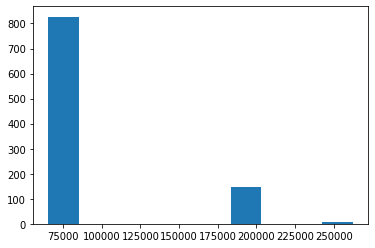

In [27]:
# hist plot for sizes
size=[image.size for image in X_covid]

plt.hist(size)

In [152]:
count=0
index=0
index_list=[]

for i in size:
    if i== 65536:
        count+=1
        index+=1
    else:
        index+=1
        index_list.append(i)

print(count)
print(len(index_list))
index_list[0]



827
153


196608

### bacterial_pneumonia

In [154]:
labels=['bacterial_pneumonia']
X_bact, y_bact = load_data();

bacterial_pneumonia


/Users/macbookair/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

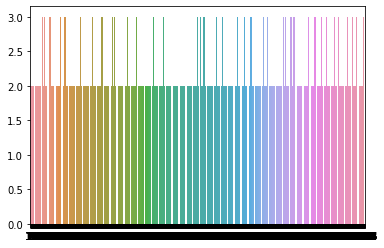

In [156]:
dim_bact=[image.ndim for image in X_bact]
sns.barplot([i for i in range(len(dim_bact))],dim_bact)

In [157]:
count=0
   
for i in dim_bact:
    if i ==3:
        count+=1
print(count)
print(len(dim_bact))
count/len(dim_bact)*100

412
2727


15.108177484415108

(array([2315.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         412.]),
 array([ 65536. ,  78643.2,  91750.4, 104857.6, 117964.8, 131072. ,
        144179.2, 157286.4, 170393.6, 183500.8, 196608. ]),
 <BarContainer object of 10 artists>)

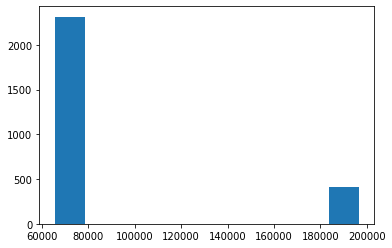

In [158]:
size=[image.size for image in X_bact]

plt.hist(size)

In [159]:
count=0
index=0
index_list=[]

for i in size:
    if i== 65536:
        count+=1
        index+=1
    else:
        index+=1
        index_list.append(i)

print(count)
print(len(index_list))
index_list[0]

2315
412


196608

### normal

In [161]:
labels=['normal'] 
X_norm, y_norm = load_data();

normal


/Users/macbookair/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

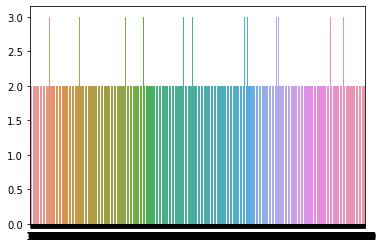

In [162]:
dim_norm=[image.ndim for image in X_norm]
sns.barplot([i for i in range(len(dim_norm))],dim_norm)

In [163]:
count=0
 
for i in dim_norm:
    if i ==3:
        count+=1
print(count)
print(len(dim_norm))
count/len(dim_norm)*100

48
1443


3.3264033264033266

(array([1395.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          48.]),
 array([ 65536. ,  78643.2,  91750.4, 104857.6, 117964.8, 131072. ,
        144179.2, 157286.4, 170393.6, 183500.8, 196608. ]),
 <BarContainer object of 10 artists>)

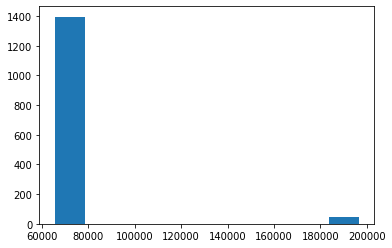

In [164]:
size=[image.size for image in X_norm]

plt.hist(size)

In [165]:
count=0
index=0
index_list=[]

for i in size:
    if i== 65536:
        count+=1
        index+=1
    else:
        index+=1
        index_list.append(i)

print(count)
print(len(index_list))
index_list[0]

1395
48


196608

In [30]:
plt.imshow(X[300],cmap='gray')
plt.title(y[300])

NameError: name 'X' is not defined

### concatenate

### pickle load